Correlation of GDP to Happiness Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
#Years included in analysis

years = [2015, 2016, 2017]

In [3]:
#Importing data from csv files

df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')

In [4]:
#Looking at sample data from 2015

df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.5870,0.0341,1.3965,1.3495,0.9414,0.6656,0.4198,0.2968,2.5174
1,Iceland,Western Europe,2,7.5610,0.0488,1.3023,1.4022,0.9478,0.6288,0.1414,0.4363,2.7020
2,Denmark,Western Europe,3,7.5270,0.0333,1.3255,1.3606,0.8746,0.6494,0.4836,0.3414,2.4920
3,Norway,Western Europe,4,7.5220,0.0388,1.4590,1.3310,0.8852,0.6697,0.3650,0.3470,2.4653
4,Canada,North America,5,7.4270,0.0355,1.3263,1.3226,0.9056,0.6330,0.3296,0.4581,2.4518


In [5]:
#Merge the 2015 and 2016 Happiness Scores based on country
happ_score = pd.merge(df1[['Country','Happiness Score']],
                      df2[['Country','Happiness Score']], 
                      on = 'Country', how = 'inner')

#Renaming columns
happ_score.rename(columns={'Happiness Score_x': 'Happiness Score 2015', 
                           'Happiness Score_y': 'Happiness Score 2016'}, 
                            inplace = True)

#Merge data with 2017 data
happ_score = pd.merge(happ_score,df3[['Country','Happiness Score']], 
                                      on = 'Country', how = 'inner')

#Renaming column
happ_score.rename(columns={'Happiness Score': 'Happiness Score 2017'}, inplace = True)

#Peek at the first 10 rows of data
happ_score.head(10)

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017
0,Switzerland,7.5870,7.5090,7.4940
1,Iceland,7.5610,7.5010,7.5040
2,Denmark,7.5270,7.5260,7.5220
3,Norway,7.5220,7.4980,7.5370
4,Canada,7.4270,7.4040,7.3160
5,Finland,7.4060,7.4130,7.4690
6,Netherlands,7.3780,7.3390,7.3770
7,Sweden,7.3640,7.2910,7.2840
8,New Zealand,7.2860,7.3340,7.3140
9,Australia,7.2840,7.3130,7.2840


In [6]:
#Check for null
happ_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 4 columns):
Country                 146 non-null object
Happiness Score 2015    146 non-null float64
Happiness Score 2016    146 non-null float64
Happiness Score 2017    146 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.7+ KB


Note that there are no null objects in the dataframe. That is because we used 'inner' in dataframe merging to remove any lines that have NaN

In [7]:
#Store happiness score per country for future use

happ_score.to_csv('HappScore_Country')

In [8]:
#Merge GDP from 2015 and 2016
happ_gdp = pd.merge(df1[['Country','Economy (GDP per Capita)']],
                    df2[['Country','Economy (GDP per Capita)']], 
                    on = 'Country', how = 'inner')

#Renaming columns
happ_gdp.rename(columns={'Economy (GDP per Capita)_x': 'GDP 2015', 
                         'Economy (GDP per Capita)_y': 'GDP 2016'}, 
                         inplace = True)

#Merge GDP from 2017
happ_gdp = pd.merge(happ_gdp,df3[['Country','Economy (GDP per Capita)']], 
                                  on = 'Country', how = 'inner')

#Renaming columns
happ_gdp.rename(columns={'Economy (GDP per Capita)': 'GDP 2017'}, inplace = True)

happ_gdp.head(10)

,Country,GDP 2015,GDP 2016,GDP 2017
0,Switzerland,1.3965,1.5273,1.5650
1,Iceland,1.3023,1.4267,1.4806
2,Denmark,1.3255,1.4418,1.4824
3,Norway,1.4590,1.5774,1.6165
4,Canada,1.3263,1.4402,1.4792
5,Finland,1.2902,1.4060,1.4436
6,Netherlands,1.3294,1.4647,1.5039
7,Sweden,1.3317,1.4518,1.4944
8,New Zealand,1.2502,1.3607,1.4057
9,Australia,1.3336,1.4444,1.4844


In [9]:
#Check for null
happ_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 4 columns):
Country     146 non-null object
GDP 2015    146 non-null float64
GDP 2016    146 non-null float64
GDP 2017    146 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.7+ KB


In [10]:
#Merge happiness score with gdp

score_and_gdp = pd.merge(happ_score, happ_gdp, on = 'Country', how = 'inner')

score_and_gdp.head()

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,GDP 2015,GDP 2016,GDP 2017
0,Switzerland,7.5870,7.5090,7.4940,1.3965,1.5273,1.5650
1,Iceland,7.5610,7.5010,7.5040,1.3023,1.4267,1.4806
2,Denmark,7.5270,7.5260,7.5220,1.3255,1.4418,1.4824
3,Norway,7.5220,7.4980,7.5370,1.4590,1.5774,1.6165
4,Canada,7.4270,7.4040,7.3160,1.3263,1.4402,1.4792


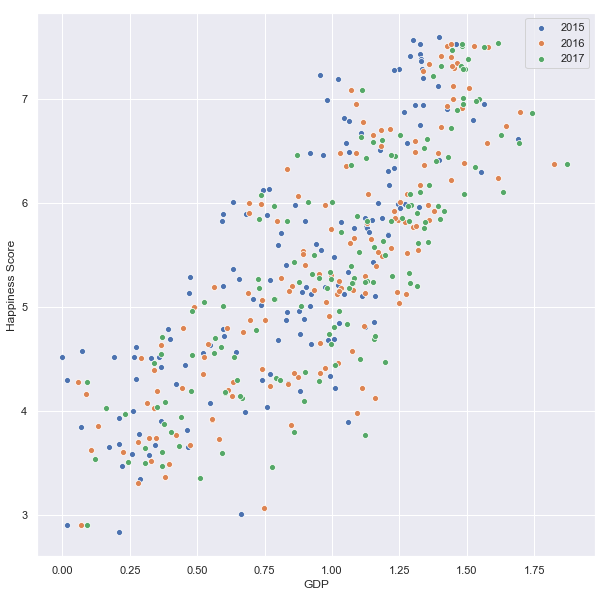

In [11]:
#Resize next plot

sns.set(rc={'figure.figsize':(10,10)})

#Plot GDP and Happiness Score for 2015, 2016, and 2017

for i in years:
    gdp_happiness_plot = sns.scatterplot(y=f'Happiness Score {i}', x=f'GDP {i}', data = score_and_gdp, label = i)
    
plt.ylabel("Happiness Score")
plt.xlabel("GDP")
plt.show()

                      Happiness Score 2015  GDP 2015
Happiness Score 2015                1.0000    0.7844
GDP 2015                            0.7844    1.0000

                      Happiness Score 2016  GDP 2016
Happiness Score 2016                1.0000    0.8102
GDP 2016                            0.8102    1.0000

                      Happiness Score 2017  GDP 2017
Happiness Score 2017                1.0000    0.8204
GDP 2017                            0.8204    1.0000



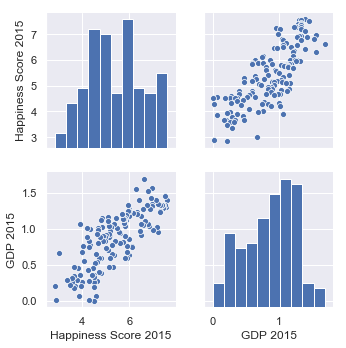

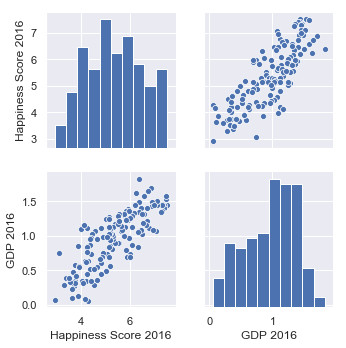

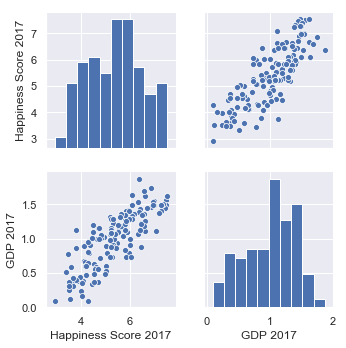

In [12]:
#Show linear correlation between Happiness Score with GDP

for i in years:
    print(score_and_gdp[[f'Happiness Score {i}',f'GDP {i}']].corr())
    print("")
    gdp_happiness_plot = sns.pairplot(score_and_gdp[[f'Happiness Score {i}',f'GDP {i}']])